In [131]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [133]:
# 데이터 로드
data = pd.read_csv("F:/kdt jupyter/Project/Data/continuous_factory_process.csv")

# copy 생성
df = data.copy()
df.head(3)

# time_stamp 데이터 타입 string -> timestamp
df["time_stamp"] = pd.to_datetime(df1["time_stamp"])

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


In [334]:
drop_rows = ["Machine1.Zone1Temperature.C.Actual", "Machine2.Zone1Temperature.C.Actual", "Machine3.Zone1Temperature.C.Actual",
               "Machine1.Zone2Temperature.C.Actual", "Machine2.Zone2Temperature.C.Actual", "Machine3.Zone2Temperature.C.Actual",
               "Machine2.ExitZoneTemperature.C.Actual", "Machine3.ExitZoneTemperature.C.Actual",
                "Machine2.MotorAmperage.U.Actual", "Machine2.MotorRPM.C.Actual",
                "FirstStage.CombinerOperation.Temperature3.C.Actual"]

##### 9655 ~ 9680 이상치 인덱스 제거

In [134]:
df = pd.concat([df1[:9655], df1[9681:]])

## Stage1 output0

In [358]:
df0 = df.copy()

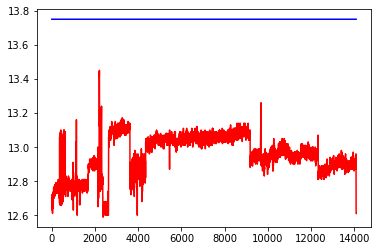

In [368]:
# output 값 12.58 보다 작은 데이터 제거
plt.plot(df0["Stage1.Output.Measurement0.U.Actual"].loc[df0["Stage1.Output.Measurement0.U.Actual"] > 12.58], "r")
plt.plot(df0["Stage1.Output.Measurement0.U.Setpoint"].loc[df0["Stage1.Output.Measurement0.U.Actual"] > 12.58], "b")

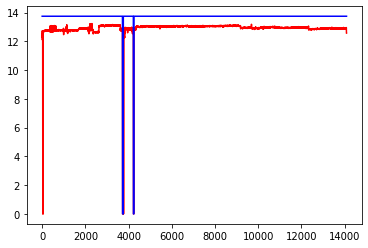

In [361]:
# output 값 13.25 보다 큰 데이터 제거
plt.plot(df0["Stage1.Output.Measurement0.U.Actual"].loc[df0["Stage1.Output.Measurement0.U.Actual"] < 13.25], "r")
plt.plot(df0["Stage1.Output.Measurement0.U.Setpoint"].loc[df0["Stage1.Output.Measurement0.U.Actual"] < 13.25], "b")

In [366]:
# 이상치 제거 데이터 생성
df0_reduced = df0.loc[(df0["Stage1.Output.Measurement0.U.Actual"] > 12.58) & (df0["Stage1.Output.Measurement0.U.Actual"] < 13.25)]

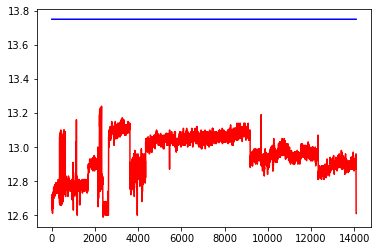

In [367]:
plt.plot(df0_reduced["Stage1.Output.Measurement0.U.Actual"], "r")
plt.plot(df0_reduced["Stage1.Output.Measurement0.U.Setpoint"], "b")

### X, y 분할

In [369]:
X0, y0 = df0_reduced.iloc[:, :42], df0_reduced.iloc[:, 42:44]
y0.head(3)

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint
0,12.72,13.75
18,12.63,13.75
19,12.63,13.75


In [370]:
X0_reduced = X0.copy()
X0_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X0_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.260000,48.030000,10.480000,...,186,421.16,200,203.950000,337.400000,13.500000,263.710000,65.300000,99.100000,108.20000
18,2019-03-06 10:52:51,17.24,23.53,11.54,200,963.00,247,1241.960000,48.970000,10.480000,...,186,421.16,200,224.360000,355.210000,13.720000,258.280000,65.500000,102.700000,109.90000
19,2019-03-06 10:52:52,17.24,23.53,11.54,200,963.00,247,1242.830000,49.240000,10.480000,...,186,421.16,200,224.910000,336.280000,13.860000,258.260000,65.500000,102.700000,110.10000
20,2019-03-06 10:52:52,17.24,23.53,11.54,200,963.00,247,1241.780852,49.684379,10.481547,...,186,421.16,200,215.617445,328.438337,13.711462,257.855607,65.500106,102.122594,110.19623
21,2019-03-06 10:52:53,17.24,23.53,11.54,200,963.00,247,1244.290000,49.910000,10.480000,...,186,421.16,200,201.360000,334.900000,13.600000,257.480000,65.500000,101.500000,110.30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14081,2019-03-06 14:47:14,13.84,24.43,12.22,201,1048.06,252,1253.040000,73.860000,12.170000,...,221,433.18,205,212.610000,342.400000,12.240000,248.210000,74.900000,115.400000,105.80000
14082,2019-03-06 14:47:15,13.84,24.43,12.22,201,1048.06,252,1262.750000,74.000000,12.210000,...,221,433.18,205,199.150000,336.280000,12.180000,248.190000,74.900000,115.400000,106.10000
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.760000,73.460000,12.210000,...,221,433.18,205,195.220000,337.500000,12.040000,248.180000,74.900000,115.400000,106.50000
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.420000,73.320000,12.170000,...,221,433.18,205,225.150000,342.430000,12.320000,248.200000,74.900000,118.100000,107.40000


## Stage1 output1

In [373]:
df1 = df.copy()

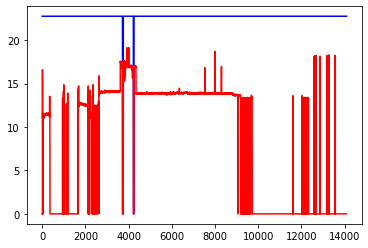

In [374]:
plt.plot(df1["Stage1.Output.Measurement1.U.Setpoint"], "b")
plt.plot(df1["Stage1.Output.Measurement1.U.Actual"], "r")

In [388]:
# 인덱스 357 ~ 1649, 9719 이후 이상치들 제거
df1 = pd.concat([df1[:357], df1[1650:9693]])

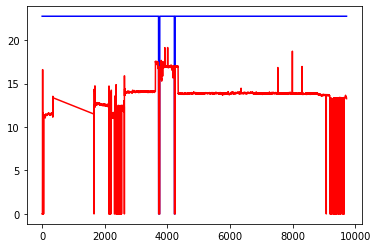

In [389]:
plt.plot(df1["Stage1.Output.Measurement1.U.Setpoint"], "b")
plt.plot(df1["Stage1.Output.Measurement1.U.Actual"], "r")

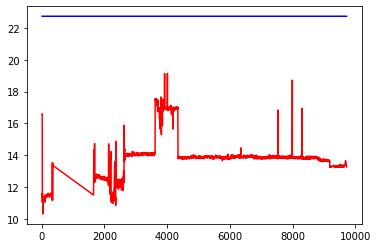

In [391]:
# output 값 0 데이터 제거
plt.plot(df1["Stage1.Output.Measurement1.U.Actual"].loc[df1["Stage1.Output.Measurement1.U.Actual"] > 0.01], "r")
plt.plot(df1["Stage1.Output.Measurement1.U.Setpoint"].loc[df1["Stage1.Output.Measurement1.U.Actual"] > 0.01], "b")

# output 값 2.97 보다 큰 데이터 제거
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"].loc[df5["Stage1.Output.Measurement5.U.Actual"] < 2.97], "r")
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"].loc[df5["Stage1.Output.Measurement5.U.Actual"] < 2.97], "b")

In [392]:
# 이상치 제거 데이터 생성
df1_reduced = df1.loc[df1["Stage1.Output.Measurement1.U.Actual"] > 0.01]
#                      & (df1["Stage1.Output.Measurement1.U.Actual"] < 2.97)]

plt.plot(df5_reduced["Stage1.Output.Measurement5.U.Actual"], "r")
plt.plot(df5_reduced["Stage1.Output.Measurement5.U.Setpoint"], "b")

### X, y 분할

In [393]:
X1, y1 = df1_reduced.iloc[:, :42], df1_reduced.iloc[:, 44:46]
y1.head(3)

,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint
14,16.60,22.74
15,16.60,22.74
18,11.41,22.74


In [394]:
X1_reduced = X1.copy()
X1_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X1_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
14,2019-03-06 10:52:47,17.24,23.53,11.54,200,963.00,247,1119.220000,49.640000,10.480000,...,186,421.16,200,224.230000,342.550000,13.700000,259.080000,65.500000,100.300000,109.70000
15,2019-03-06 10:52:48,17.24,23.53,11.54,200,963.00,247,1103.320000,50.180000,10.520000,...,186,421.16,200,220.640000,340.950000,13.890000,258.930000,65.500000,100.300000,113.40000
18,2019-03-06 10:52:51,17.24,23.53,11.54,200,963.00,247,1241.960000,48.970000,10.480000,...,186,421.16,200,224.360000,355.210000,13.720000,258.280000,65.500000,102.700000,109.90000
19,2019-03-06 10:52:52,17.24,23.53,11.54,200,963.00,247,1242.830000,49.240000,10.480000,...,186,421.16,200,224.910000,336.280000,13.860000,258.260000,65.500000,102.700000,110.10000
20,2019-03-06 10:52:52,17.24,23.53,11.54,200,963.00,247,1241.780852,49.684379,10.481547,...,186,421.16,200,215.617445,328.438337,13.711462,257.855607,65.500106,102.122594,110.19623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9714,2019-03-06 13:34:24,14.04,24.19,12.90,215,980.53,251,1260.880000,63.500000,11.280000,...,221,433.18,205,179.810000,340.380000,13.230000,247.570000,75.300000,114.800000,104.50000
9715,2019-03-06 13:34:25,14.04,24.19,12.90,215,980.53,251,1253.970000,63.100000,11.250000,...,221,433.18,205,176.470000,342.890000,13.250000,247.990000,75.300000,114.800000,104.50000
9716,2019-03-06 13:34:26,14.04,24.19,12.90,215,980.53,251,1261.240000,62.690000,11.310000,...,221,433.18,205,195.040000,347.240000,13.190000,248.210000,75.300000,114.800000,104.60000
9717,2019-03-06 13:34:27,14.04,24.19,12.90,215,980.53,251,1267.140000,62.160000,11.280000,...,221,433.18,205,215.340000,342.000000,13.220000,248.200000,75.300000,114.700000,104.00000


## Stage1 output2

In [346]:
df2 = df.copy()

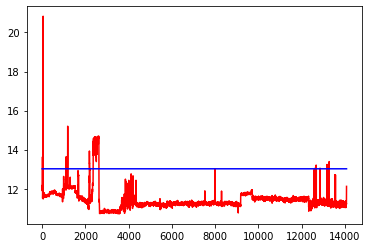

In [355]:
# output 값 10.5 보다 작은 데이터 제거
plt.plot(df2["Stage1.Output.Measurement2.U.Actual"].loc[df2["Stage1.Output.Measurement2.U.Actual"] > 10.5], "r")
plt.plot(df2["Stage1.Output.Measurement2.U.Setpoint"].loc[df2["Stage1.Output.Measurement2.U.Actual"] > 10.5], "b")

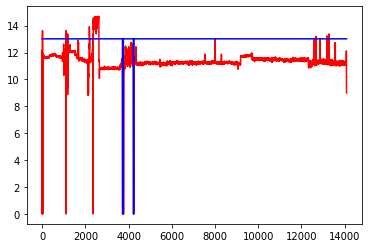

In [349]:
# output 값 15 보다 큰 데이터 제거
plt.plot(df2["Stage1.Output.Measurement2.U.Actual"].loc[df2["Stage1.Output.Measurement2.U.Actual"] < 15], "r")
plt.plot(df2["Stage1.Output.Measurement2.U.Setpoint"].loc[df2["Stage1.Output.Measurement2.U.Actual"] < 15], "b")

In [353]:
# 이상치 제거 데이터 생성
df2_reduced = df2.loc[(df2["Stage1.Output.Measurement2.U.Actual"] > 10.5) & (df2["Stage1.Output.Measurement2.U.Actual"] < 15)]

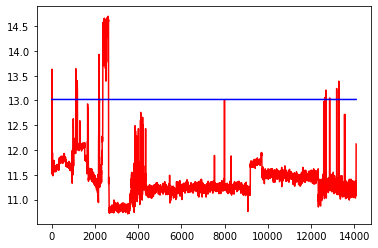

In [354]:
plt.plot(df2_reduced["Stage1.Output.Measurement2.U.Actual"], "r")
plt.plot(df2_reduced["Stage1.Output.Measurement2.U.Setpoint"], "b")

### X, y 분할

In [356]:
X2, y2 = df2_reduced.iloc[:, :42], df2_reduced.iloc[:, 46:48]
y2.head(3)

,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint
0,12.16,13.02
6,11.89,13.02
7,11.89,13.02


In [357]:
X2_reduced = X2.copy()
X2_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X2_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,48.03,10.48,...,186,421.16,200,203.95,337.40,13.50,263.71,65.3,99.1,108.2
6,2019-03-06 10:52:39,17.24,23.53,11.54,200,963.00,247,1306.38,48.70,10.45,...,186,421.16,200,223.10,345.76,13.81,261.03,65.4,99.6,109.9
7,2019-03-06 10:52:40,17.24,23.53,11.54,200,963.00,247,1296.13,49.78,10.48,...,186,421.16,200,220.17,351.83,13.49,260.61,65.4,99.6,109.0
14,2019-03-06 10:52:47,17.24,23.53,11.54,200,963.00,247,1119.22,49.64,10.48,...,186,421.16,200,224.23,342.55,13.70,259.08,65.5,100.3,109.7
15,2019-03-06 10:52:48,17.24,23.53,11.54,200,963.00,247,1103.32,50.18,10.52,...,186,421.16,200,220.64,340.95,13.89,258.93,65.5,100.3,113.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14076,2019-03-06 14:47:09,13.84,24.43,12.22,201,1048.06,252,1269.34,73.86,12.08,...,221,433.18,205,204.48,338.85,12.18,248.22,74.9,113.5,106.1
14077,2019-03-06 14:47:10,13.84,24.43,12.22,201,1048.06,252,1254.87,73.86,12.14,...,221,433.18,205,194.49,337.57,12.26,248.18,74.9,113.5,105.6
14078,2019-03-06 14:47:11,13.84,24.43,12.22,201,1048.06,252,1261.11,72.65,12.21,...,221,433.18,205,208.12,342.36,12.20,248.20,74.9,117.7,105.7
14079,2019-03-06 14:47:12,13.84,24.43,12.22,201,1048.06,252,1262.15,72.78,12.17,...,221,433.18,205,203.40,339.93,12.34,248.20,74.9,117.7,106.2


## Stage1 output3

In [339]:
df3 = df.copy()

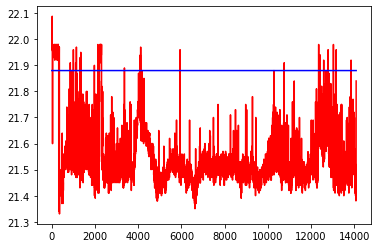

In [342]:
# output 값 5 보다 작은 데이터 제거
plt.plot(df3["Stage1.Output.Measurement3.U.Actual"].loc[df3["Stage1.Output.Measurement3.U.Actual"] > 21.3], "r")
plt.plot(df3["Stage1.Output.Measurement3.U.Setpoint"].loc[df3["Stage1.Output.Measurement3.U.Actual"] > 21.3], "b")

# output 값 22 보다 큰 데이터 제거
plt.plot(df6["Stage1.Output.Measurement6.U.Actual"].loc[df6["Stage1.Output.Measurement6.U.Actual"] < ], "r")
plt.plot(df6["Stage1.Output.Measurement6.U.Setpoint"].loc[df6["Stage1.Output.Measurement6.U.Actual"] < ], "b")

In [343]:
# 이상치 제거 데이터 생성
df3_reduced = df3.loc[df3["Stage1.Output.Measurement3.U.Actual"] > 21.3]
#                      ) & (df4["Stage1.Output.Measurement4.U.Actual"] < 6.5)]

plt.plot(df6_reduced["Stage1.Output.Measurement6.U.Actual"], "r")
plt.plot(df6_reduced["Stage1.Output.Measurement6.U.Setpoint"], "b")

### X, y 분할

In [344]:
X3, y3 = df3_reduced.iloc[:, :42], df3_reduced.iloc[:, 48:50]
y3.head(3)

,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint
0,21.97,21.88
6,21.96,21.88
7,21.96,21.88


In [345]:
X3_reduced = X3.copy()
X3_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X3_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,48.03,10.48,...,186,421.16,200,203.95,337.40,13.50,263.71,65.3,99.1,108.2
6,2019-03-06 10:52:39,17.24,23.53,11.54,200,963.00,247,1306.38,48.70,10.45,...,186,421.16,200,223.10,345.76,13.81,261.03,65.4,99.6,109.9
7,2019-03-06 10:52:40,17.24,23.53,11.54,200,963.00,247,1296.13,49.78,10.48,...,186,421.16,200,220.17,351.83,13.49,260.61,65.4,99.6,109.0
16,2019-03-06 10:52:49,17.24,23.53,11.54,200,963.00,247,1179.70,49.64,10.52,...,186,421.16,200,209.89,345.78,13.68,258.80,65.5,100.3,110.5
17,2019-03-06 10:52:50,17.24,23.53,11.54,200,963.00,247,1222.09,49.24,10.52,...,186,421.16,200,189.03,342.48,13.73,258.25,65.5,102.7,110.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,73.46,12.21,...,221,433.18,205,195.22,337.50,12.04,248.18,74.9,115.4,106.5
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,73.32,12.17,...,221,433.18,205,225.15,342.43,12.32,248.20,74.9,118.1,107.4
14085,2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,73.59,12.14,...,221,433.18,205,210.46,334.89,12.18,248.92,74.9,118.1,108.0
14086,2019-03-06 14:47:19,13.84,24.43,12.22,201,1048.06,252,1261.99,74.40,12.21,...,221,433.18,205,188.43,342.03,12.27,248.23,74.9,118.1,108.2


## Stage1 output4

In [331]:
df4 = df.copy()

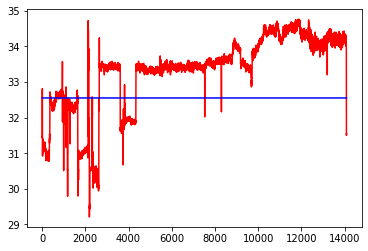

In [333]:
# output 값 5 보다 작은 데이터 제거
plt.plot(df4["Stage1.Output.Measurement4.U.Actual"].loc[df4["Stage1.Output.Measurement4.U.Actual"] > 5], "r")
plt.plot(df4["Stage1.Output.Measurement4.U.Setpoint"].loc[df4["Stage1.Output.Measurement4.U.Actual"] > 5], "b")

# output 값 6.5 보다 큰 데이터 제거
plt.plot(df6["Stage1.Output.Measurement6.U.Actual"].loc[df6["Stage1.Output.Measurement6.U.Actual"] < 6.5], "r")
plt.plot(df6["Stage1.Output.Measurement6.U.Setpoint"].loc[df6["Stage1.Output.Measurement6.U.Actual"] < 6.5], "b")

In [335]:
# 이상치 제거 데이터 생성
df4_reduced = df4.loc[df4["Stage1.Output.Measurement4.U.Actual"] > 5]
#                      ) & (df4["Stage1.Output.Measurement4.U.Actual"] < 6.5)]

plt.plot(df6_reduced["Stage1.Output.Measurement6.U.Actual"], "r")
plt.plot(df6_reduced["Stage1.Output.Measurement6.U.Setpoint"], "b")

### X, y 분할

In [336]:
X4, y4 = df4_reduced.iloc[:, :42], df4_reduced.iloc[:, 50:52]
y4.head(3)

,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement4.U.Setpoint
4,31.44,32.55
5,31.44,32.55
8,31.83,32.55


In [337]:
X4_reduced = X4.copy()
X4_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X4_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.00,247,1252.83,48.57,10.48,...,186,421.16,200,200.86,337.05,13.72,262.17,65.4,99.6,109.8
5,2019-03-06 10:52:38,17.24,23.53,11.54,200,963.00,247,1262.73,48.70,10.48,...,186,421.16,200,208.78,350.49,13.76,261.39,65.4,99.6,109.9
8,2019-03-06 10:52:41,17.24,23.53,11.54,200,963.00,247,1251.11,49.37,10.48,...,186,421.16,200,210.96,332.66,13.59,260.59,65.4,99.3,109.9
9,2019-03-06 10:52:42,17.24,23.53,11.54,200,963.00,247,1202.16,49.64,10.52,...,186,421.16,200,220.74,339.50,13.60,260.58,65.4,99.3,109.9
10,2019-03-06 10:52:43,17.24,23.53,11.54,200,963.00,247,1202.57,49.37,10.48,...,186,421.16,200,222.18,354.74,13.99,259.89,65.4,99.3,110.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,73.46,12.21,...,221,433.18,205,195.22,337.50,12.04,248.18,74.9,115.4,106.5
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,73.32,12.17,...,221,433.18,205,225.15,342.43,12.32,248.20,74.9,118.1,107.4
14085,2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,73.59,12.14,...,221,433.18,205,210.46,334.89,12.18,248.92,74.9,118.1,108.0
14086,2019-03-06 14:47:19,13.84,24.43,12.22,201,1048.06,252,1261.99,74.40,12.21,...,221,433.18,205,188.43,342.03,12.27,248.23,74.9,118.1,108.2


## Stage1 output5

In [319]:
df5 = df.copy()

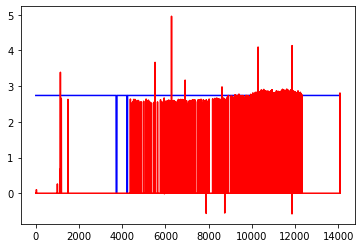

In [320]:
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"], "b")
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"], "r")

In [321]:
# 인덱스 4377 이전, 12310 이후 이상치들 제거
df5 = df5[4378:12284]

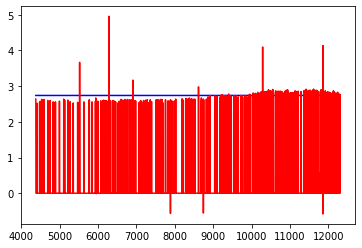

In [322]:
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"], "b")
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"], "r")

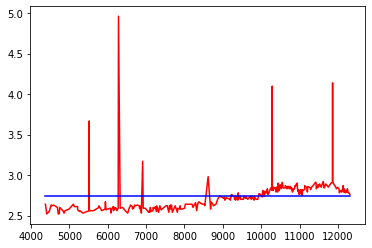

In [324]:
# output 값 2 보다 작은 데이터 제거
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"].loc[df5["Stage1.Output.Measurement5.U.Actual"] > 2], "r")
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"].loc[df5["Stage1.Output.Measurement5.U.Actual"] > 2], "b")

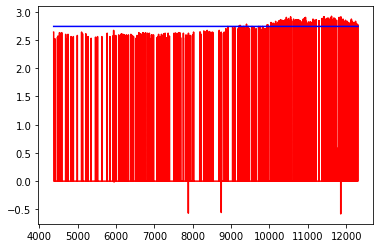

In [325]:
# output 값 2.97 보다 큰 데이터 제거
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"].loc[df5["Stage1.Output.Measurement5.U.Actual"] < 2.97], "r")
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"].loc[df5["Stage1.Output.Measurement5.U.Actual"] < 2.97], "b")

In [326]:
# 이상치 제거 데이터 생성
df5_reduced = df5.loc[(df5["Stage1.Output.Measurement5.U.Actual"] > 2) & (df5["Stage1.Output.Measurement5.U.Actual"] < 2.97)]

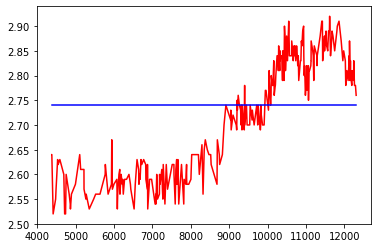

In [327]:
plt.plot(df5_reduced["Stage1.Output.Measurement5.U.Actual"], "r")
plt.plot(df5_reduced["Stage1.Output.Measurement5.U.Setpoint"], "b")

### X, y 분할

In [329]:
X5, y5 = df5_reduced.iloc[:, :42], df5_reduced.iloc[:, 52:54]
y5.head(3)

,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement5.U.Setpoint
4378,2.64,2.74
4379,2.64,2.74
4412,2.52,2.74


In [330]:
X5_reduced = X5.copy()
X5_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X5_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
4378,2019-03-06 12:05:27,16.63,23.77,11.54,200,963.00,247,1291.87,70.90,10.55,...,192,408.97,202,223.96,360.10,13.67,253.34,74.8,105.0,61.9
4379,2019-03-06 12:05:28,16.63,23.77,11.54,200,963.00,247,1286.02,71.30,10.52,...,192,408.97,202,198.04,360.67,13.66,253.59,74.8,105.0,62.3
4412,2019-03-06 12:06:01,16.63,23.77,11.54,200,963.00,247,1273.76,71.98,10.52,...,192,408.97,202,183.84,362.59,13.70,253.18,74.9,105.2,61.7
4413,2019-03-06 12:06:02,16.63,23.77,11.54,200,963.00,247,1291.68,72.65,10.48,...,192,408.97,202,189.33,360.21,13.64,252.93,74.9,105.2,61.4
4477,2019-03-06 12:07:06,16.63,23.77,11.54,200,963.00,247,1262.47,72.78,10.48,...,192,408.97,202,208.50,359.92,13.63,253.38,74.9,104.8,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12265,2019-03-06 14:16:58,13.94,24.33,11.54,200,1027.43,247,1039.78,72.38,11.99,...,221,433.18,205,181.10,340.64,12.80,247.40,75.1,118.1,104.8
12290,2019-03-06 14:17:23,13.94,24.33,11.54,200,1027.43,247,1117.75,70.63,12.02,...,221,433.18,205,191.55,339.53,12.75,248.22,75.1,118.7,104.7
12291,2019-03-06 14:17:24,13.94,24.33,11.54,200,1027.43,247,1037.23,70.90,11.99,...,221,433.18,205,211.85,335.57,12.58,247.56,75.1,118.7,104.9
12308,2019-03-06 14:17:41,13.94,24.33,11.54,200,1027.43,247,1252.66,71.98,11.96,...,221,433.18,205,199.92,341.24,12.74,248.19,75.1,118.7,104.6


## Stage1 output6

In [291]:
df6 = df.copy()

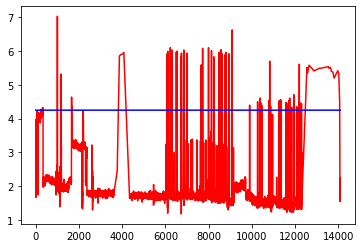

In [293]:
# output 값 1 보다 작은 데이터 제거
plt.plot(df6["Stage1.Output.Measurement6.U.Actual"].loc[df6["Stage1.Output.Measurement6.U.Actual"] > 1], "r")
plt.plot(df6["Stage1.Output.Measurement6.U.Setpoint"].loc[df6["Stage1.Output.Measurement6.U.Actual"] > 1], "b")

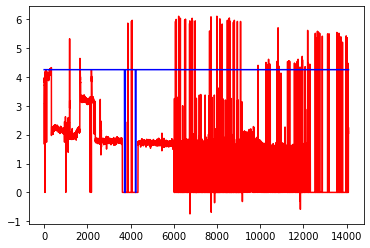

In [294]:
# output 값 6.5 보다 큰 데이터 제거
plt.plot(df6["Stage1.Output.Measurement6.U.Actual"].loc[df6["Stage1.Output.Measurement6.U.Actual"] < 6.5], "r")
plt.plot(df6["Stage1.Output.Measurement6.U.Setpoint"].loc[df6["Stage1.Output.Measurement6.U.Actual"] < 6.5], "b")

In [295]:
# 이상치 제거 데이터 생성
df6_reduced = df6.loc[(df6["Stage1.Output.Measurement6.U.Actual"] > 1) & (df6["Stage1.Output.Measurement6.U.Actual"] < 6.5)]

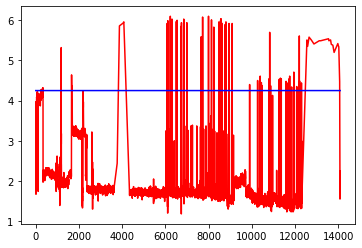

In [296]:
plt.plot(df6_reduced["Stage1.Output.Measurement6.U.Actual"], "r")
plt.plot(df6_reduced["Stage1.Output.Measurement6.U.Setpoint"], "b")

### X, y 분할

In [298]:
X6, y6 = df6_reduced.iloc[:, :42], df6_reduced.iloc[:, 54:56]
y6.head(3)

,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement6.U.Setpoint
0,3.82,4.25
1,3.97,4.25
2,3.97,4.25


In [299]:
X6_reduced = X6.copy()
X6_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X6_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,48.03,10.48,...,186,421.16,200,203.95,337.40,13.50,263.71,65.3,99.1,108.2
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.00,247,1246.09,48.03,10.48,...,186,421.16,200,213.36,341.85,13.59,262.88,65.3,99.1,109.2
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.00,247,1246.29,48.16,10.48,...,186,421.16,200,225.25,338.71,14.00,262.63,65.3,99.6,111.0
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.00,247,1247.59,48.57,10.48,...,186,421.16,200,213.99,339.15,13.67,262.22,65.4,99.6,109.2
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.00,247,1252.83,48.57,10.48,...,186,421.16,200,200.86,337.05,13.72,262.17,65.4,99.6,109.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,73.46,12.21,...,221,433.18,205,195.22,337.50,12.04,248.18,74.9,115.4,106.5
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,73.32,12.17,...,221,433.18,205,225.15,342.43,12.32,248.20,74.9,118.1,107.4
14085,2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,73.59,12.14,...,221,433.18,205,210.46,334.89,12.18,248.92,74.9,118.1,108.0
14086,2019-03-06 14:47:19,13.84,24.43,12.22,201,1048.06,252,1261.99,74.40,12.21,...,221,433.18,205,188.43,342.03,12.27,248.23,74.9,118.1,108.2


## Stage1 output7

In [252]:
df7 = df.copy()

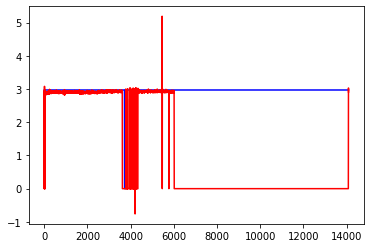

In [266]:
plt.plot(df7["Stage1.Output.Measurement7.U.Setpoint"], "b")
plt.plot(df7["Stage1.Output.Measurement7.U.Actual"], "r")

In [267]:
# 인덱스 6015 이후 이상치들 제거
df7 = df7[:6015]

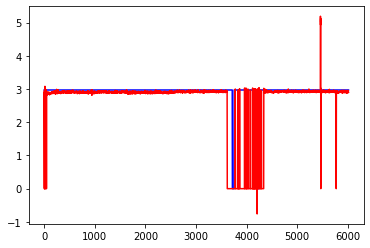

In [268]:
plt.plot(df7["Stage1.Output.Measurement7.U.Setpoint"], "b")
plt.plot(df7["Stage1.Output.Measurement7.U.Actual"], "r")

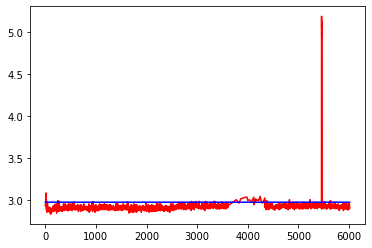

In [285]:
# output 값 2.82 보다 작은 데이터 제거
plt.plot(df7["Stage1.Output.Measurement7.U.Actual"].loc[df7["Stage1.Output.Measurement7.U.Actual"] > 2.82], "r")
plt.plot(df7["Stage1.Output.Measurement7.U.Setpoint"].loc[df7["Stage1.Output.Measurement7.U.Actual"] > 2.82], "b")

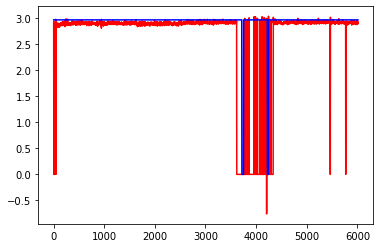

In [286]:
# output 값 3.05 보다 큰 데이터 제거
plt.plot(df7["Stage1.Output.Measurement7.U.Actual"].loc[df7["Stage1.Output.Measurement7.U.Actual"] < 3.05], "r")
plt.plot(df7["Stage1.Output.Measurement7.U.Setpoint"].loc[df7["Stage1.Output.Measurement7.U.Actual"] < 3.05], "b")

In [287]:
# 이상치 제거 데이터 생성
df7_reduced = df7.loc[(df7["Stage1.Output.Measurement7.U.Actual"] > 2.82) & (df7["Stage1.Output.Measurement7.U.Actual"] < 3.05)]

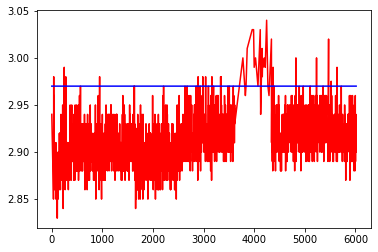

In [288]:
plt.plot(df7_reduced["Stage1.Output.Measurement7.U.Actual"], "r")
plt.plot(df7_reduced["Stage1.Output.Measurement7.U.Setpoint"], "b")

### X, y 분할

In [289]:
X7, y7 = df7_reduced.iloc[:, :42], df7_reduced.iloc[:, 56:58]
y7.head(3)

,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement7.U.Setpoint
0,2.94,2.97
6,2.92,2.97
7,2.92,2.97


In [290]:
X7_reduced = X7.copy()
X7_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X7_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,48.03,10.48,...,186,421.16,200,203.95,337.40,13.50,263.71,65.3,99.1,108.2
6,2019-03-06 10:52:39,17.24,23.53,11.54,200,963.00,247,1306.38,48.70,10.45,...,186,421.16,200,223.10,345.76,13.81,261.03,65.4,99.6,109.9
7,2019-03-06 10:52:40,17.24,23.53,11.54,200,963.00,247,1296.13,49.78,10.48,...,186,421.16,200,220.17,351.83,13.49,260.61,65.4,99.6,109.0
18,2019-03-06 10:52:51,17.24,23.53,11.54,200,963.00,247,1241.96,48.97,10.48,...,186,421.16,200,224.36,355.21,13.72,258.28,65.5,102.7,109.9
19,2019-03-06 10:52:52,17.24,23.53,11.54,200,963.00,247,1242.83,49.24,10.48,...,186,421.16,200,224.91,336.28,13.86,258.26,65.5,102.7,110.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,2019-03-06 12:32:39,15.34,23.53,11.54,200,1027.43,247,1266.37,71.84,10.73,...,192,408.97,202,190.89,364.67,13.29,256.69,75.5,104.7,72.3
6011,2019-03-06 12:32:40,15.34,23.53,11.54,200,1027.43,247,1262.35,71.44,10.70,...,192,408.97,202,199.54,365.67,13.34,256.70,75.5,104.7,69.5
6012,2019-03-06 12:32:41,15.34,23.53,11.54,200,1027.43,247,1267.11,71.30,10.70,...,192,408.97,202,205.68,365.06,13.29,256.68,75.5,104.2,74.7
6013,2019-03-06 12:32:42,15.34,23.53,11.54,200,1027.43,247,1294.00,72.78,10.67,...,192,408.97,202,190.71,362.31,13.37,257.42,75.5,104.2,76.5


## Stage1 output8

In [236]:
df8 = df.copy()

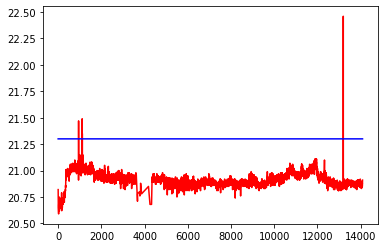

In [245]:
# output 값 20.57 보다 작은 데이터 제거
plt.plot(df8["Stage1.Output.Measurement8.U.Actual"].loc[df8["Stage1.Output.Measurement8.U.Actual"] > 20.57], "r")
plt.plot(df8["Stage1.Output.Measurement8.U.Setpoint"].loc[df8["Stage1.Output.Measurement8.U.Actual"] > 20.57], "b")

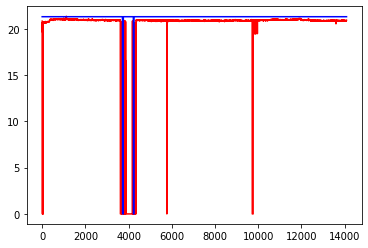

In [240]:
# output 값 21.4 보다 큰 데이터 제거
plt.plot(df8["Stage1.Output.Measurement8.U.Actual"].loc[df8["Stage1.Output.Measurement8.U.Actual"] < 21.2], "r")
plt.plot(df8["Stage1.Output.Measurement8.U.Setpoint"].loc[df8["Stage1.Output.Measurement8.U.Actual"] < 21.4], "b")

In [246]:
# 이상치 제거 데이터 생성
df8_reduced = df8.loc[(df8["Stage1.Output.Measurement8.U.Actual"] > 20.57) & (df8["Stage1.Output.Measurement8.U.Actual"] < 21.2)]

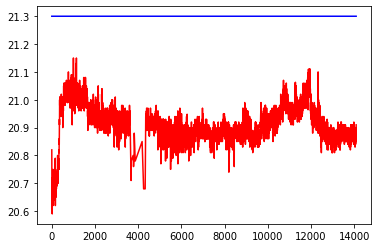

In [247]:
plt.plot(df8_reduced["Stage1.Output.Measurement8.U.Actual"], "r")
plt.plot(df8_reduced["Stage1.Output.Measurement8.U.Setpoint"], "b")

### X, y 분할

In [249]:
X8, y8 = df8_reduced.iloc[:, :42], df8_reduced.iloc[:, 58:60]
y8.head(3)

,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement8.U.Setpoint
0,20.82,21.3
6,20.65,21.3
7,20.65,21.3


In [250]:
X8_reduced = X8.copy()
X8_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X8_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,48.03,10.48,...,186,421.16,200,203.95,337.40,13.50,263.71,65.3,99.1,108.2
6,2019-03-06 10:52:39,17.24,23.53,11.54,200,963.00,247,1306.38,48.70,10.45,...,186,421.16,200,223.10,345.76,13.81,261.03,65.4,99.6,109.9
7,2019-03-06 10:52:40,17.24,23.53,11.54,200,963.00,247,1296.13,49.78,10.48,...,186,421.16,200,220.17,351.83,13.49,260.61,65.4,99.6,109.0
18,2019-03-06 10:52:51,17.24,23.53,11.54,200,963.00,247,1241.96,48.97,10.48,...,186,421.16,200,224.36,355.21,13.72,258.28,65.5,102.7,109.9
19,2019-03-06 10:52:52,17.24,23.53,11.54,200,963.00,247,1242.83,49.24,10.48,...,186,421.16,200,224.91,336.28,13.86,258.26,65.5,102.7,110.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,73.46,12.21,...,221,433.18,205,195.22,337.50,12.04,248.18,74.9,115.4,106.5
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,73.32,12.17,...,221,433.18,205,225.15,342.43,12.32,248.20,74.9,118.1,107.4
14085,2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,73.59,12.14,...,221,433.18,205,210.46,334.89,12.18,248.92,74.9,118.1,108.0
14086,2019-03-06 14:47:19,13.84,24.43,12.22,201,1048.06,252,1261.99,74.40,12.21,...,221,433.18,205,188.43,342.03,12.27,248.23,74.9,118.1,108.2


## Stage1 output9

In [212]:
df9 = df.copy()

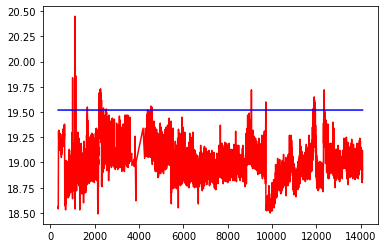

In [226]:
# output 값 18.45 보다 작은 데이터 제거
plt.plot(df9["Stage1.Output.Measurement9.U.Actual"].loc[df9["Stage1.Output.Measurement9.U.Actual"] > 18.45], "r")
plt.plot(df9["Stage1.Output.Measurement9.U.Setpoint"].loc[df9["Stage1.Output.Measurement9.U.Actual"] > 18.45], "b")

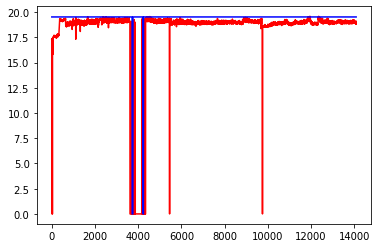

In [230]:
# output 값 19.6 보다 큰 데이터 제거
plt.plot(df9["Stage1.Output.Measurement9.U.Actual"].loc[df9["Stage1.Output.Measurement9.U.Actual"] < 19.6], "r")
plt.plot(df9["Stage1.Output.Measurement9.U.Setpoint"].loc[df9["Stage1.Output.Measurement9.U.Actual"] < 19.6], "b")

In [232]:
# 이상치 제거 데이터 생성
df9_reduced = df9.loc[(df9["Stage1.Output.Measurement9.U.Actual"] > 18.45) & (df9["Stage1.Output.Measurement9.U.Actual"] < 19.6)]

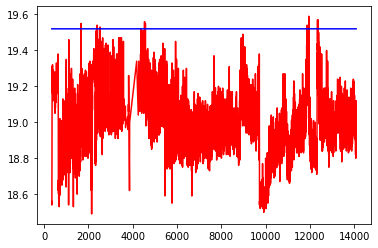

In [233]:
plt.plot(df9_reduced["Stage1.Output.Measurement9.U.Actual"], "r")
plt.plot(df9_reduced["Stage1.Output.Measurement9.U.Setpoint"], "b")

### X, y 분할

In [234]:
X9, y9 = df9_reduced.iloc[:, :42], df9_reduced.iloc[:, 60:62]
y9.head(3)

,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement9.U.Setpoint
347,18.56,19.52
348,18.56,19.52
349,18.56,19.52


In [235]:
X9_reduced = X9.copy()
X9_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X9_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
347,2019-03-06 10:58:17,17.24,23.53,11.54,200,963.00,247,1309.38,82.61,10.39,...,186,421.16,200,217.23,344.57,13.76,244.12,67.7,104.9,113.4
348,2019-03-06 10:58:18,17.24,23.53,11.54,200,963.00,247,1203.72,86.24,10.45,...,186,421.16,200,212.02,344.58,13.74,243.61,67.7,104.9,113.7
349,2019-03-06 10:58:19,17.24,23.53,11.54,200,963.00,247,1171.88,88.53,10.48,...,186,421.16,200,208.52,341.03,13.61,243.59,67.7,104.9,113.9
350,2019-03-06 10:58:20,17.24,23.53,11.54,200,963.00,247,1199.59,87.45,10.48,...,186,421.16,200,207.42,332.86,13.79,243.55,67.7,104.6,114.1
351,2019-03-06 10:58:21,17.24,23.53,11.54,200,963.00,247,1270.30,86.78,10.55,...,186,421.16,200,219.12,334.68,13.64,242.99,67.7,104.6,114.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,73.46,12.21,...,221,433.18,205,195.22,337.50,12.04,248.18,74.9,115.4,106.5
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,73.32,12.17,...,221,433.18,205,225.15,342.43,12.32,248.20,74.9,118.1,107.4
14085,2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,73.59,12.14,...,221,433.18,205,210.46,334.89,12.18,248.92,74.9,118.1,108.0
14086,2019-03-06 14:47:19,13.84,24.43,12.22,201,1048.06,252,1261.99,74.40,12.21,...,221,433.18,205,188.43,342.03,12.27,248.23,74.9,118.1,108.2


## Stage1 output10

In [204]:
df10 = df.copy()

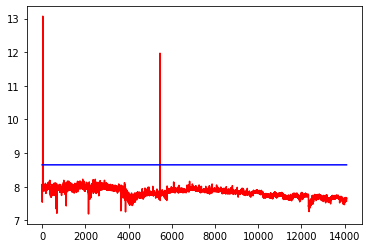

In [205]:
# output 값 5 보다 작은 데이터 제거
plt.plot(df10["Stage1.Output.Measurement10.U.Actual"].loc[df10["Stage1.Output.Measurement10.U.Actual"] > 5], "r")
plt.plot(df10["Stage1.Output.Measurement10.U.Setpoint"].loc[df10["Stage1.Output.Measurement10.U.Actual"] > 5], "b")

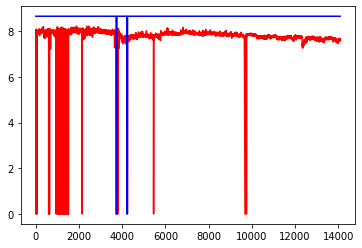

In [206]:
# output 값 10보다 큰 데이터 제거
plt.plot(df10["Stage1.Output.Measurement10.U.Actual"].loc[df10["Stage1.Output.Measurement10.U.Actual"] < 10], "r")
plt.plot(df10["Stage1.Output.Measurement10.U.Setpoint"].loc[df10["Stage1.Output.Measurement10.U.Actual"] < 10], "b")

In [207]:
# 이상치 제거 데이터 생성
df10_reduced = df10.loc[(df10["Stage1.Output.Measurement10.U.Actual"] > 5) & (df10["Stage1.Output.Measurement10.U.Actual"] < 10)]

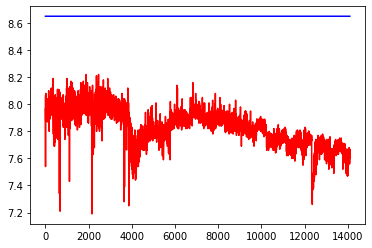

In [208]:
plt.plot(df10_reduced["Stage1.Output.Measurement10.U.Actual"], "r")
plt.plot(df10_reduced["Stage1.Output.Measurement10.U.Setpoint"], "b")

### X, y 분할

In [209]:
X10, y10 = df10_reduced.iloc[:, :42], df10_reduced.iloc[:, 62:64]
y10.head(3)

,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint
0,8.06,8.65
1,7.55,8.65
2,7.55,8.65


In [210]:
X10_reduced = X10.copy()
X10_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X10_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,48.03,10.48,...,186,421.16,200,203.95,337.40,13.50,263.71,65.3,99.1,108.2
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.00,247,1246.09,48.03,10.48,...,186,421.16,200,213.36,341.85,13.59,262.88,65.3,99.1,109.2
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.00,247,1246.29,48.16,10.48,...,186,421.16,200,225.25,338.71,14.00,262.63,65.3,99.6,111.0
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.00,247,1247.59,48.57,10.48,...,186,421.16,200,213.99,339.15,13.67,262.22,65.4,99.6,109.2
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.00,247,1252.83,48.57,10.48,...,186,421.16,200,200.86,337.05,13.72,262.17,65.4,99.6,109.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,73.46,12.21,...,221,433.18,205,195.22,337.50,12.04,248.18,74.9,115.4,106.5
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,73.32,12.17,...,221,433.18,205,225.15,342.43,12.32,248.20,74.9,118.1,107.4
14085,2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,73.59,12.14,...,221,433.18,205,210.46,334.89,12.18,248.92,74.9,118.1,108.0
14086,2019-03-06 14:47:19,13.84,24.43,12.22,201,1048.06,252,1261.99,74.40,12.21,...,221,433.18,205,188.43,342.03,12.27,248.23,74.9,118.1,108.2


## Stage1 output11

In [191]:
df11 = df.copy()

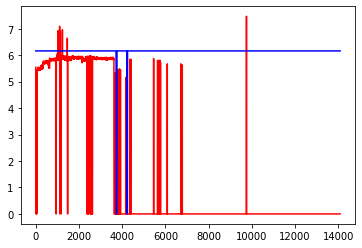

In [192]:
# 첫 번째 Setpoint 이후로는 거의 0값
plt.plot(df11["Stage1.Output.Measurement11.U.Actual"], "r")
plt.plot(df11["Stage1.Output.Measurement11.U.Setpoint"], "b")

In [193]:
# 첫 번째 Setpoint 이후 데이터 삭제
df11["Stage1.Output.Measurement11.U.Actual"][3614:3618]
df11 = df11[:3616]

3614    5.87
3615    5.85
3616    0.00
3617    0.00
Name: Stage1.Output.Measurement11.U.Actual, dtype: float64

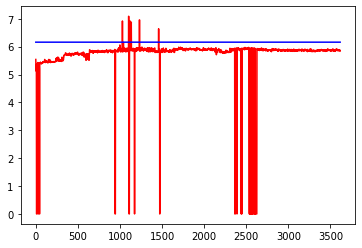

In [194]:
plt.plot(df11["Stage1.Output.Measurement11.U.Actual"], "r")
plt.plot(df11["Stage1.Output.Measurement11.U.Setpoint"], "b")

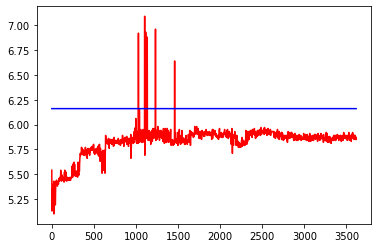

In [195]:
# output 값 4 보다 작은 데이터 제거
plt.plot(df11["Stage1.Output.Measurement11.U.Actual"].loc[df11["Stage1.Output.Measurement11.U.Actual"] > 4], "r")
plt.plot(df11["Stage1.Output.Measurement11.U.Setpoint"].loc[df11["Stage1.Output.Measurement11.U.Actual"] > 4], "b")

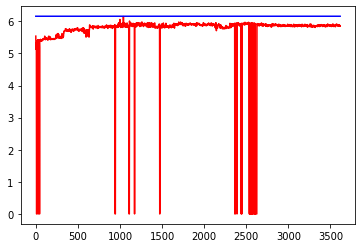

In [196]:
# output 값 6.5보다 큰 데이터 제거
plt.plot(df11["Stage1.Output.Measurement11.U.Actual"].loc[df11["Stage1.Output.Measurement11.U.Actual"] < 6.5], "r")
plt.plot(df11["Stage1.Output.Measurement11.U.Setpoint"].loc[df11["Stage1.Output.Measurement11.U.Actual"] < 6.5], "b")

In [197]:
# 이상치 제거 데이터 생성
df11_reduced = df11.loc[(df11["Stage1.Output.Measurement11.U.Actual"] > 4) & (df11["Stage1.Output.Measurement11.U.Actual"] < 6.5)]

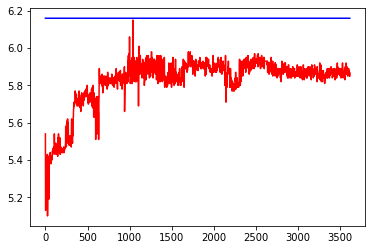

In [198]:
plt.plot(df11_reduced["Stage1.Output.Measurement11.U.Actual"], "r")
plt.plot(df11_reduced["Stage1.Output.Measurement11.U.Setpoint"], "b")

### X, y 분할

In [202]:
X11, y11 = df11_reduced.iloc[:, :42], df11_reduced.iloc[:, 64:66]
y11.head(3)

,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint
0,5.54,6.16
1,5.13,6.16
2,5.13,6.16


In [203]:
X11_reduced = X11.copy()
X11_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X11_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,48.03,10.48,...,186,421.16,200,203.95,337.40,13.50,263.71,65.3,99.1,108.2
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,48.03,10.48,...,186,421.16,200,213.36,341.85,13.59,262.88,65.3,99.1,109.2
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,48.16,10.48,...,186,421.16,200,225.25,338.71,14.00,262.63,65.3,99.6,111.0
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,48.57,10.48,...,186,421.16,200,213.99,339.15,13.67,262.22,65.4,99.6,109.2
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,48.57,10.48,...,186,421.16,200,200.86,337.05,13.72,262.17,65.4,99.6,109.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,2019-03-06 11:52:41,16.54,24.16,11.54,200,963.0,247,1252.69,72.52,10.52,...,186,421.16,200,187.64,331.59,13.70,235.99,73.7,103.6,64.2
3612,2019-03-06 11:52:42,16.54,24.16,11.54,200,963.0,247,1263.81,72.52,10.52,...,186,421.16,200,160.34,336.66,13.74,236.64,73.7,103.6,63.7
3613,2019-03-06 11:52:43,16.54,24.16,11.54,200,963.0,247,1264.13,73.73,10.45,...,186,421.16,200,191.21,334.93,13.62,236.38,73.7,103.6,63.8
3614,2019-03-06 11:52:44,16.54,24.16,11.54,200,963.0,247,1261.85,73.59,10.52,...,186,421.16,200,210.25,333.18,13.81,236.52,73.7,103.6,64.0


## Stage1 output12

In [156]:
df12 = df.copy()

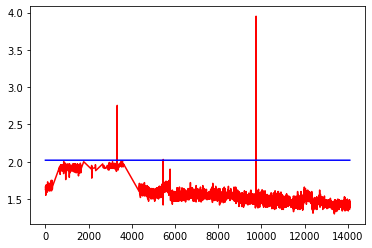

In [165]:
# output 값 1.15보다 작은 데이터 제거
plt.plot(df12["Stage1.Output.Measurement12.U.Actual"].loc[df12["Stage1.Output.Measurement12.U.Actual"] > 1.15], "r")
plt.plot(df12["Stage1.Output.Measurement12.U.Setpoint"].loc[df12["Stage1.Output.Measurement12.U.Actual"] > 1.15], "b")

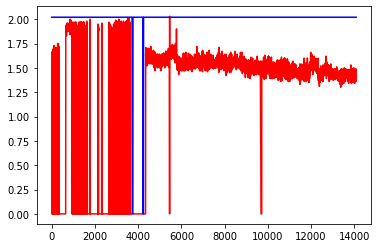

In [166]:
# output 값 2.5보다 큰 데이터 제거
plt.plot(df12["Stage1.Output.Measurement12.U.Actual"].loc[df12["Stage1.Output.Measurement12.U.Actual"] < 2.5], "r")
plt.plot(df12["Stage1.Output.Measurement12.U.Setpoint"].loc[df12["Stage1.Output.Measurement12.U.Actual"] < 2.5], "b")

In [167]:
# 이상치 제거 데이터 생성
df12_reduced = df12.loc[(df12["Stage1.Output.Measurement12.U.Actual"] > 1.15) & (df12["Stage1.Output.Measurement12.U.Actual"] < 2.5)]

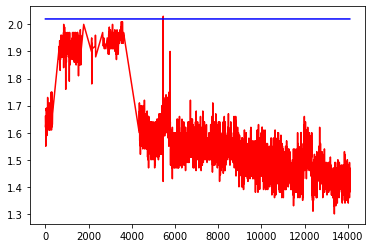

In [168]:
plt.plot(df12_reduced["Stage1.Output.Measurement12.U.Actual"], "r")
plt.plot(df12_reduced["Stage1.Output.Measurement12.U.Setpoint"], "b")

### X, y 분할

In [169]:
X12, y12 = df12_reduced.iloc[:, :42], df12_reduced.iloc[:, 66:68]
y12.head(3)

,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint
0,1.66,2.02
1,1.04,2.02
2,1.04,2.02


In [171]:
X12_reduced = X12.copy()
X12_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X12_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,48.03,10.48,...,186,421.16,200,203.95,337.40,13.50,263.71,65.3,99.1,108.2
6,2019-03-06 10:52:39,17.24,23.53,11.54,200,963.00,247,1306.38,48.70,10.45,...,186,421.16,200,223.10,345.76,13.81,261.03,65.4,99.6,109.9
7,2019-03-06 10:52:40,17.24,23.53,11.54,200,963.00,247,1296.13,49.78,10.48,...,186,421.16,200,220.17,351.83,13.49,260.61,65.4,99.6,109.0
12,2019-03-06 10:52:45,17.24,23.53,11.54,200,963.00,247,1252.53,49.51,10.48,...,186,421.16,200,213.98,346.50,13.60,259.82,65.4,100.1,109.9
13,2019-03-06 10:52:46,17.24,23.53,11.54,200,963.00,247,1246.91,49.91,10.52,...,186,421.16,200,217.40,335.43,13.40,259.22,65.4,100.1,109.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,73.46,12.21,...,221,433.18,205,195.22,337.50,12.04,248.18,74.9,115.4,106.5
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,73.32,12.17,...,221,433.18,205,225.15,342.43,12.32,248.20,74.9,118.1,107.4
14085,2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,73.59,12.14,...,221,433.18,205,210.46,334.89,12.18,248.92,74.9,118.1,108.0
14086,2019-03-06 14:47:19,13.84,24.43,12.22,201,1048.06,252,1261.99,74.40,12.21,...,221,433.18,205,188.43,342.03,12.27,248.23,74.9,118.1,108.2


## Stage1 output13

In [138]:
df13 = df.copy()

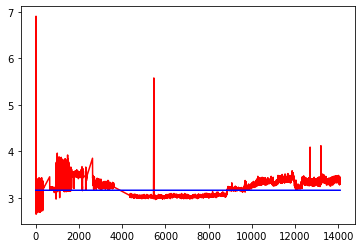

In [140]:
# output 값 2보다 작은 데이터 제거
plt.plot(df13["Stage1.Output.Measurement13.U.Actual"].loc[df13["Stage1.Output.Measurement13.U.Actual"] > 2], "r")
plt.plot(df13["Stage1.Output.Measurement13.U.Setpoint"].loc[df13["Stage1.Output.Measurement13.U.Actual"] > 2], "b")

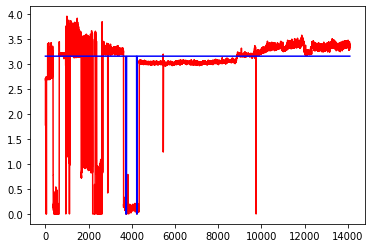

In [141]:
# output 값 4보다 큰 데이터 제거
plt.plot(df13["Stage1.Output.Measurement13.U.Actual"].loc[df13["Stage1.Output.Measurement13.U.Actual"] < 4], "r")
plt.plot(df13["Stage1.Output.Measurement13.U.Setpoint"].loc[df13["Stage1.Output.Measurement13.U.Actual"] < 4], "b")

In [142]:
# 이상치 제거 데이터 생성
df13_reduced = df13.loc[(df13["Stage1.Output.Measurement13.U.Actual"] > 2) & (df13["Stage1.Output.Measurement13.U.Actual"] < 4)]

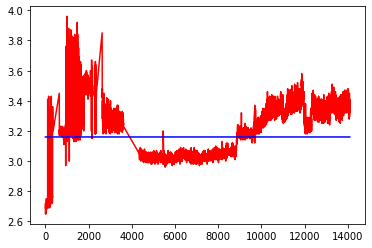

In [143]:
plt.plot(df13_reduced["Stage1.Output.Measurement13.U.Actual"], "r")
plt.plot(df13_reduced["Stage1.Output.Measurement13.U.Setpoint"], "b")

### X, y 분할

In [144]:
X13, y13 = df13_reduced.iloc[:, :42], df13_reduced.iloc[:, 68:70]
y13.head(3)

,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint
0,2.69,3.16
1,2.70,3.16
2,2.70,3.16


In [145]:
X13_reduced = X13.copy()
X13_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X13_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,48.03,10.48,...,186,421.16,200,203.95,337.40,13.50,263.71,65.3,99.1,108.2
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.00,247,1246.09,48.03,10.48,...,186,421.16,200,213.36,341.85,13.59,262.88,65.3,99.1,109.2
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.00,247,1246.29,48.16,10.48,...,186,421.16,200,225.25,338.71,14.00,262.63,65.3,99.6,111.0
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.00,247,1247.59,48.57,10.48,...,186,421.16,200,213.99,339.15,13.67,262.22,65.4,99.6,109.2
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.00,247,1252.83,48.57,10.48,...,186,421.16,200,200.86,337.05,13.72,262.17,65.4,99.6,109.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,73.46,12.21,...,221,433.18,205,195.22,337.50,12.04,248.18,74.9,115.4,106.5
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,73.32,12.17,...,221,433.18,205,225.15,342.43,12.32,248.20,74.9,118.1,107.4
14085,2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,73.59,12.14,...,221,433.18,205,210.46,334.89,12.18,248.92,74.9,118.1,108.0
14086,2019-03-06 14:47:19,13.84,24.43,12.22,201,1048.06,252,1261.99,74.40,12.21,...,221,433.18,205,188.43,342.03,12.27,248.23,74.9,118.1,108.2


## Stage1 output14

In [135]:
df14 = df.copy()

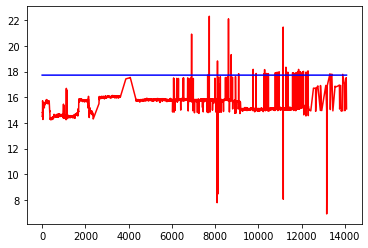

In [136]:
# output 값 1보다 작은 데이터 제거
plt.plot(df14["Stage1.Output.Measurement14.U.Actual"].loc[df14["Stage1.Output.Measurement14.U.Actual"] > 1], "r")
plt.plot(df14["Stage1.Output.Measurement14.U.Setpoint"].loc[df14["Stage1.Output.Measurement14.U.Actual"] > 1], "b")

##### 20보다 큰이상치 인덱스 검색

In [108]:
df14["Stage1.Output.Measurement14.U.Actual"].loc[df14["Stage1.Output.Measurement14.U.Actual"] > 20]

6911     20.910000
6912     20.910000
7730     22.301788
8617     22.100000
8618     22.100000
11148    21.457282
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [109]:
df14["Stage1.Output.Measurement14.U.Actual"][6908:6915]

6908     0.00
6909     0.00
6910     0.00
6911    20.91
6912    20.91
6913    15.77
6914    15.77
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [110]:
df14["Stage1.Output.Measurement14.U.Actual"][7727:7733]

7727     0.000000
7728     0.000000
7729    15.750000
7730    22.301788
7731    15.750000
7732     0.000000
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [111]:
df14["Stage1.Output.Measurement14.U.Actual"][8614:8621]

8614    15.78
8615    15.78
8616    15.78
8617    22.10
8618    22.10
8619     0.00
8620     0.00
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [112]:
df14["Stage1.Output.Measurement14.U.Actual"][11145:11151]

11171    15.06
11172    15.10
11173    15.10
11174    15.05
11175    15.07
11176    15.06
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

##### 20보다 큰 인덱스들도 삭제

##### 10보다 작은 이상치 인덱스 검색

In [113]:
df14["Stage1.Output.Measurement14.U.Actual"].loc[(df14["Stage1.Output.Measurement14.U.Actual"] < 10) & (df14["Stage1.Output.Measurement14.U.Actual"] > 6)]

8093     7.794189
8127     8.470173
11152    8.062649
13161    6.919961
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [114]:
df14["Stage1.Output.Measurement14.U.Actual"][8090:8097]

8090     0.000000
8091     0.000000
8092     0.000000
8093     7.794189
8094    15.740000
8095    15.900000
8096    14.820000
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [115]:
df14["Stage1.Output.Measurement14.U.Actual"][8124:8131]

8124    15.760000
8125     0.000000
8126     0.000000
8127     8.470173
8128    15.820000
8129    15.820000
8130    15.820000
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [116]:
df14["Stage1.Output.Measurement14.U.Actual"][11149:11156]

11175    15.07
11176    15.06
11177    15.06
11178    15.06
11179    15.06
11180    15.03
11181     0.00
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [117]:
df14["Stage1.Output.Measurement14.U.Actual"][13158:13165]

13184     0.00
13185    16.91
13186    16.91
13187    16.91
13188     0.00
13189     0.00
13190     0.00
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

##### 이상치인 0으로 오거나 가는 과정에서 나타난 것으로 보임

##### 제거 가능할 듯

In [397]:
# 이상치 제거 데이터 생성
df14_reduced = df14.loc[(df14["Stage1.Output.Measurement14.U.Actual"] > 10) & (df14["Stage1.Output.Measurement14.U.Actual"] < 20)]

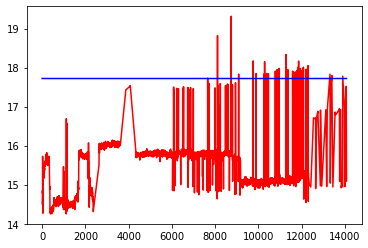

In [398]:
plt.plot(df14_reduced["Stage1.Output.Measurement14.U.Actual"], "r")
plt.plot(df14_reduced["Stage1.Output.Measurement14.U.Setpoint"], "b")

### X, y 분할

In [120]:
X14, y14 = df14_reduced.iloc[:, :42], df1_reduced.iloc[:, 70:72]
y14.head(3)

,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint
0,14.51,17.72
6,14.60,17.72
7,14.60,17.72


In [121]:
X14_reduced = X14.copy()
X14_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X14_reduced

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,...,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,48.03,10.48,...,186,421.16,200,203.95,337.40,13.50,263.71,65.3,99.1,108.2
6,2019-03-06 10:52:39,17.24,23.53,11.54,200,963.00,247,1306.38,48.70,10.45,...,186,421.16,200,223.10,345.76,13.81,261.03,65.4,99.6,109.9
7,2019-03-06 10:52:40,17.24,23.53,11.54,200,963.00,247,1296.13,49.78,10.48,...,186,421.16,200,220.17,351.83,13.49,260.61,65.4,99.6,109.0
14,2019-03-06 10:52:47,17.24,23.53,11.54,200,963.00,247,1119.22,49.64,10.48,...,186,421.16,200,224.23,342.55,13.70,259.08,65.5,100.3,109.7
15,2019-03-06 10:52:48,17.24,23.53,11.54,200,963.00,247,1103.32,50.18,10.52,...,186,421.16,200,220.64,340.95,13.89,258.93,65.5,100.3,113.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14063,2019-03-06 14:46:56,13.84,24.43,12.22,201,1048.06,252,1180.45,72.78,12.08,...,221,433.18,205,196.17,342.73,12.21,248.20,74.9,114.8,106.1
14064,2019-03-06 14:46:57,13.84,24.43,12.22,201,1048.06,252,1252.80,72.78,12.08,...,221,433.18,205,204.85,340.68,12.21,248.21,74.9,114.8,106.0
14076,2019-03-06 14:47:09,13.84,24.43,12.22,201,1048.06,252,1269.34,73.86,12.08,...,221,433.18,205,204.48,338.85,12.18,248.22,74.9,113.5,106.1
14077,2019-03-06 14:47:10,13.84,24.43,12.22,201,1048.06,252,1254.87,73.86,12.14,...,221,433.18,205,194.49,337.57,12.26,248.18,74.9,113.5,105.6


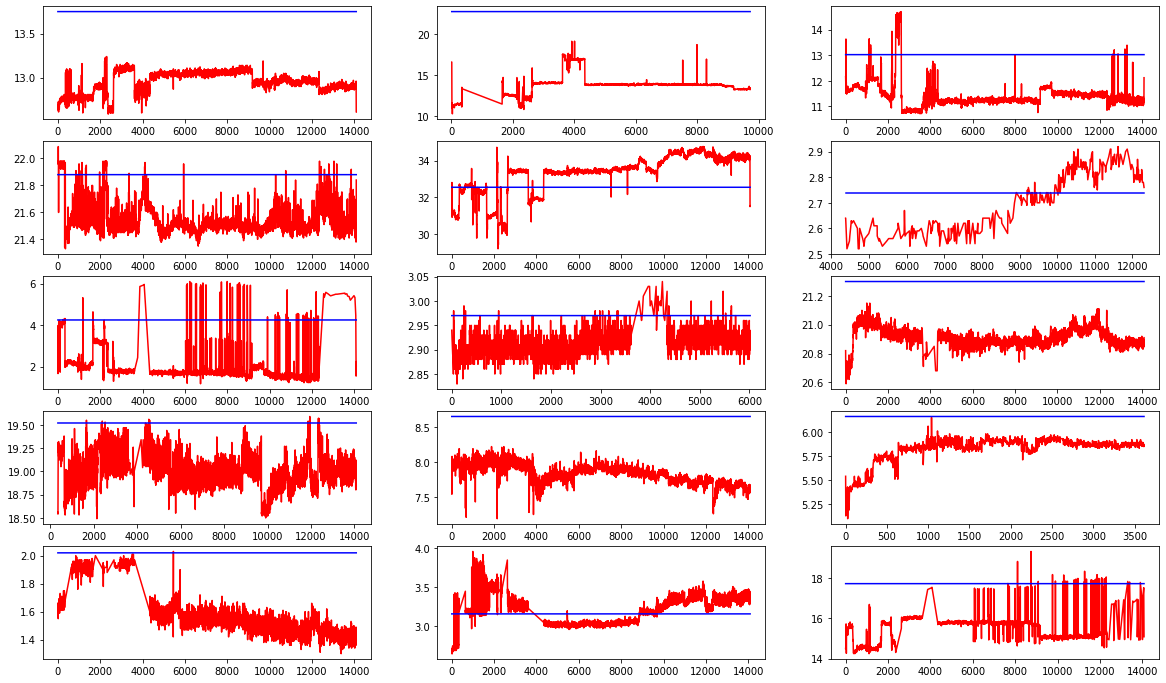

In [415]:
fig, ax = plt.subplots(5, 3, figsize = (20, 12))

ax[0, 0].plot(df0_reduced["Stage1.Output.Measurement0.U.Actual"], "r")
ax[0, 0].plot(df0_reduced["Stage1.Output.Measurement0.U.Setpoint"], "b")
ax[0, 1].plot(df1_reduced["Stage1.Output.Measurement1.U.Actual"], "r")
ax[0, 1].plot(df1_reduced["Stage1.Output.Measurement1.U.Setpoint"], "b")
ax[0, 2].plot(df2_reduced["Stage1.Output.Measurement2.U.Actual"], "r")
ax[0, 2].plot(df2_reduced["Stage1.Output.Measurement2.U.Setpoint"], "b")

ax[1, 0].plot(df3_reduced["Stage1.Output.Measurement3.U.Actual"], "r")
ax[1, 0].plot(df3_reduced["Stage1.Output.Measurement3.U.Setpoint"], "b")
ax[1, 1].plot(df4_reduced["Stage1.Output.Measurement4.U.Actual"], "r")
ax[1, 1].plot(df4_reduced["Stage1.Output.Measurement4.U.Setpoint"], "b")
ax[1, 2].plot(df5_reduced["Stage1.Output.Measurement5.U.Actual"], "r")
ax[1, 2].plot(df5_reduced["Stage1.Output.Measurement5.U.Setpoint"], "b")

ax[2, 0].plot(df6_reduced["Stage1.Output.Measurement6.U.Actual"], "r")
ax[2, 0].plot(df6_reduced["Stage1.Output.Measurement6.U.Setpoint"], "b")
ax[2, 1].plot(df7_reduced["Stage1.Output.Measurement7.U.Actual"], "r")
ax[2, 1].plot(df7_reduced["Stage1.Output.Measurement7.U.Setpoint"], "b")
ax[2, 2].plot(df8_reduced["Stage1.Output.Measurement8.U.Actual"], "r")
ax[2, 2].plot(df8_reduced["Stage1.Output.Measurement8.U.Setpoint"], "b")

ax[3, 0].plot(df9_reduced["Stage1.Output.Measurement9.U.Actual"], "r")
ax[3, 0].plot(df9_reduced["Stage1.Output.Measurement9.U.Setpoint"], "b")
ax[3, 1].plot(df10_reduced["Stage1.Output.Measurement10.U.Actual"], "r")
ax[3, 1].plot(df10_reduced["Stage1.Output.Measurement10.U.Setpoint"], "b")
ax[3, 2].plot(df11_reduced["Stage1.Output.Measurement11.U.Actual"], "r")
ax[3, 2].plot(df11_reduced["Stage1.Output.Measurement11.U.Setpoint"], "b")

ax[4, 0].plot(df12_reduced["Stage1.Output.Measurement12.U.Actual"], "r")
ax[4, 0].plot(df12_reduced["Stage1.Output.Measurement12.U.Setpoint"], "b")
ax[4, 1].plot(df13_reduced["Stage1.Output.Measurement13.U.Actual"], "r")
ax[4, 1].plot(df13_reduced["Stage1.Output.Measurement13.U.Setpoint"], "b")
ax[4, 2].plot(df14_reduced["Stage1.Output.Measurement14.U.Actual"], "r")
ax[4, 2].plot(df14_reduced["Stage1.Output.Measurement14.U.Setpoint"], "b")

plt.show()